# 1. Authenticate to Twitter

In [2]:
# import modules
import pandas as pd
import tweepy
from credentials import *

In [3]:
# Authenticate
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Set Tokens
auth.set_access_token(access_token, access_token_secret)

# Instantiate API
api = tweepy.API(auth, wait_on_rate_limit=True)

# 2. Get Tweets

In [4]:
hashtag = "#AvatarTheWayOfWater"
date_since = '2022-12-15' # December 15, 2022
numtweet = 1000

In [5]:
# We are using .Cursor() to search
# through twitter for the required tweets.
# The number of tweets can be
# restricted using .items(number of tweets)
query = tweepy.Cursor(api.search, hashtag, lang='en', result_type="recent",
                      since_id=date_since, tweet_mode='extended').items(numtweet)

In [7]:
# .Cursor() returns an iterable object. Each item in
# the iterator has various attributes
# that you can access to
# get information about each tweet
list_tweets = [tweet for tweet in query]

In [8]:
# inpect 
list_tweets[0].entities

{'hashtags': [{'text': 'AvatarTheWayofWater', 'indices': [16, 36]}],
 'symbols': [],
 'user_mentions': [{'screen_name': 'letscinema',
   'name': 'LetsCinema',
   'id': 1090513571581091840,
   'id_str': '1090513571581091840',
   'indices': [3, 14]}],
 'urls': [],
 'media': [{'id': 1609588920634990592,
   'id_str': '1609588920634990592',
   'indices': [107, 130],
   'media_url': 'http://pbs.twimg.com/media/FlZomGjaYAAWMDL.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/FlZomGjaYAAWMDL.jpg',
   'url': 'https://t.co/G1PNLSuyDW',
   'display_url': 'pic.twitter.com/G1PNLSuyDW',
   'expanded_url': 'https://twitter.com/letscinema/status/1609588929396887553/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 1080, 'h': 1080, 'resize': 'fit'},
    'small': {'w': 680, 'h': 680, 'resize': 'fit'},
    'medium': {'w': 1080, 'h': 1080, 'resize': 'fit'}},
   'source_status_id': 1609588929396887553,
   'source_status_id_str': '16095889

In [9]:
# Creating DataFrame using pandas
df = pd.DataFrame(columns=['username',
                           'bio',
                           'location',
                           'following',
                           'followers',
                           'totaltweets',
                           'retweetcount',
                           'qouted',
                           'verified',
                           'source',
                           'text',
                           'hashtags'])

In [10]:
for tweet in list_tweets:
    username = tweet.user.screen_name
    description = tweet.user.description
    location = tweet.user.location
    following = tweet.user.friends_count
    followers = tweet.user.followers_count
    totaltweets = tweet.user.statuses_count
    retweetcount = tweet.retweet_count
    qouted = tweet.is_quote_status
    verified = tweet.user.verified
    source = tweet.source
    hashtags = tweet.entities['hashtags']

    # Retweets can be distinguished by
    # a retweeted_status attribute,
    # in case it is an invalid reference,
    # except block will be executed
    try:
            text = tweet.retweeted_status.full_text
    except AttributeError:
            text = tweet.full_text
            
    # Hashtags
    hashtext = list()
    for h in range(len(hashtags)):
        hashtext.append(hashtags[h]['text'])
        
    # Here we are appending all the
    # extracted information in the DataFrame
    ith_tweet = [username, description,
                 location, following,
                 followers, totaltweets,
                 retweetcount, qouted, verified,
                 source, text, hashtext]
    df.loc[len(df)] = ith_tweet

In [11]:
df.head()

,username,bio,location,following,followers,totaltweets,retweetcount,qouted,verified,source,text,hashtags
0,PrinceR34984409,,,11,24,5827,345,False,False,Twitter for Android,#AvatarTheWayofWater has collected $1.3 Billio...,[AvatarTheWayofWater]
1,dev_sethu,தமிழன்டா என்னாலும் !! சொன்னாலே திமிர் ஏறும் !!!,,886,329,16752,308,False,False,Twitter for Android,Highest prebooked movie ever - #Valimai\nBigge...,"[Valimai, Beast, Vikram]"
2,PaoraBaton,*Space-Pirating* Filmmaking...,,97,3,40,0,False,False,Twitter for iPhone,LETS GOOOOO!!! #AvatarTheWayOfWater @officiala...,[AvatarTheWayOfWater]
3,AkashMa50574757,landed on 16th Jan 98,"Vijayawada, India",252,533,43016,73,False,False,Twitter for Android,#CinetrakFlash: Top 3 Movies In APTS for 01 Ja...,"[CinetrakFlash, Dhamaka, AvatarTheWayOfWater]"
4,taekook_421,"bts, skz, atz, svt, tbz, txt, p1h, nct, Enhypen","Chicago, IL",628,177,88077,153,False,False,Twitter for iPhone,Check out this #AvatarTheWayOfWater inspired f...,[AvatarTheWayOfWater]


In [12]:
df.text[0]

'#AvatarTheWayofWater has collected $1.3 Billion (₹ 10757 crores) at the global box office. https://t.co/G1PNLSuyDW'

In [13]:
df.text.duplicated().sum()

275

In [36]:
clean_text = df.text.drop_duplicates()

In [15]:
clean_text.shape

(173,)

# EDA

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
df.location.value_counts()

                             474
Hyderabad, India              20
India                         18
1899 Netflix                  12
Chennai, India                12
                            ... 
Thailand                       1
Maharashtra, India             1
வண்டலூருக்கு மிக அருகில்.      1
Granada, Spain                 1
Bengaluru South, India         1
Name: location, Length: 296, dtype: int64

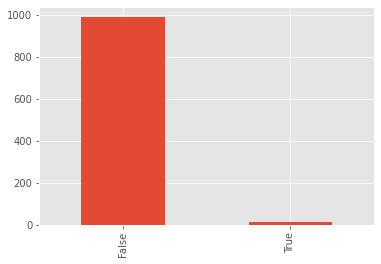

In [ ]:
df.verified.value_counts().plot.bar();

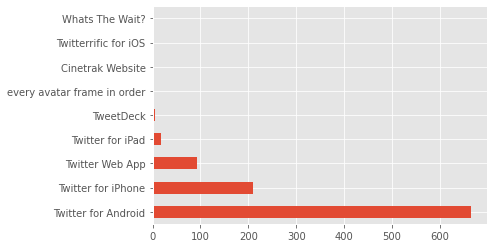

In [ ]:
df.source.value_counts().plot.barh();

In [ ]:
df.totaltweets.value_counts()

543       22
36371     14
95662     12
120780    12
57927     11
          ..
1323       1
7439       1
11903      1
80597      1
9292       1
Name: totaltweets, Length: 682, dtype: int64

In [ ]:
df.retweetcount.value_counts()

226     100
82       81
0        65
31       55
1        35
       ... 
2204      1
42        1
49        1
72        1
140       1
Name: retweetcount, Length: 103, dtype: int64

# Pipepline

In [ ]:
!pip install transformers -U

In [31]:
from transformers import pipeline

pipe = pipeline("sentiment-analysis", model='cardiffnlp/twitter-roberta-base-sentiment')

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
clean_text[0], clean_text[1], clean_text[2]

('Behind the scenes of #AvatarTheWayOfWater \n\n🎥 thefilmzone | IG https://t.co/LhSKCG1LP0',
 "🌊 It's time for a new adventure, head to Pandora and experience #AvatarTheWayOfWater in cinemas in 3D now! https://t.co/kIkfomBXVV",
 '#AvatarTheWayofWater has collected $1.3 Billion (₹ 10757 crores) at the global box office. https://t.co/G1PNLSuyDW')

In [ ]:
pipe(
    [clean_text[0], clean_text[1], clean_text[2]]
)

[{'label': 'LABEL_1', 'score': 0.8790819644927979},
 {'label': 'LABEL_2', 'score': 0.8161628246307373},
 {'label': 'LABEL_1', 'score': 0.701197624206543}]

In [ ]:
scores = pipe(list(clean_text.values))
scores[:5]

[{'label': 'LABEL_1', 'score': 0.8790819644927979},
 {'label': 'LABEL_2', 'score': 0.8161628246307373},
 {'label': 'LABEL_1', 'score': 0.701197624206543},
 {'label': 'LABEL_2', 'score': 0.8317704796791077},
 {'label': 'LABEL_2', 'score': 0.7007561922073364}]

In [ ]:
# Apply it to the df
scores_df = pd.DataFrame(scores)
scores_df['sentiment'] = scores_df['label'].map({'LABEL_0': 'Negative',
                                                 'LABEL_1': 'Neutral',
                                                 'LABEL_2': 'Positive'})
scores_df

,label,score,sentiment
0,LABEL_1,0.879082,Neutral
1,LABEL_2,0.816163,Positive
2,LABEL_1,0.701198,Neutral
3,LABEL_2,0.831770,Positive
4,LABEL_2,0.700756,Positive
...,...,...,...
257,LABEL_0,0.759135,Negative
258,LABEL_2,0.860960,Positive
259,LABEL_2,0.866710,Positive
260,LABEL_2,0.522062,Positive


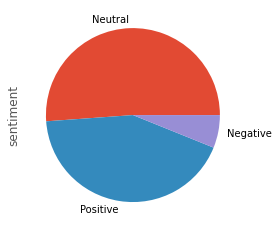

In [ ]:
scores_df['sentiment'].value_counts().plot.pie();

In [ ]:
import numpy as np

# inspect the beggist score
np.argmax(scores_df['score'])

151

In [ ]:
clean_text.values[151]

'#AvatarTheWayOfWater is wonderful!Best 3D ever &amp;totally IMMERSIVE.The evening water scenes in particular are incredible!Loved the new water tribe &amp; ecological msg\U0001fae1.LONG but enjoyable,just take a breath,sit back.. take it in.Perfect end to 2022! \n🌟🌟🌟🌟 #JamesCameron #avatar https://t.co/hZe2Rxfgs2'

In [ ]:
# inspect the lowest score
clean_text.values[np.argmin(scores_df['score'])]

'2022 ended &amp; 2023 started with massive entertainment\U0001f90c\n\n#AvatarTheWayofWater \n#Dhamaka\n\ngood to see many pre pandemic film buffs enjoying films again instead of pathetic detailing filled with stupidity \n\nfilms are meant for "theatrical entertainment" not for "theoretical studies"'

# 3. Sentiment with Roberta Pretrained Model

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from torch import nn

In [ ]:
checkpoint = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(df.text[0], return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0, 43414,     5,  5422,     9,   849, 23389, 18416,   133, 24450,
         10643, 25589,  1437, 50118, 50118,  6569, 12736,  8210,     5, 21928,
         13930,  1721, 17374,  1205,   640,    90,     4,   876,    73,   574,
           298, 17342, 40099,   134, 21992,   288,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-1.6672,  1.9429, -0.2598]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
scores = nn.functional.softmax(output[0][0], dim=0)
scores

tensor([0.0238, 0.8791, 0.0971], grad_fn=<SoftmaxBackward0>)

In [ ]:
scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
scores_dict

{'roberta_neg': tensor(0.0238, grad_fn=<SelectBackward0>),
 'roberta_neu': tensor(0.8791, grad_fn=<SelectBackward0>),
 'roberta_pos': tensor(0.0971, grad_fn=<SelectBackward0>)}

In [ ]:
# Apply it to the df
from tqdm import tqdm

preds = []
for t in tqdm(clean_text.values):
    encoded_text = tokenizer(t, return_tensors='pt')
    output = model(**encoded_text)
    scores = nn.functional.softmax(output[0][0], dim=0)
    preds.append(scores)

 95%|█████████▌| 250/262 [01:32<00:04,  2.76it/s]

# Preprocessing

In [17]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.2 MB/s 


In [25]:
from bs4 import BeautifulSoup 
import re
import unidecode
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords # import stopwords
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
# https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"                 # dingbats
        u"\u3030"
                      "]+", flags=re.UNICODE)
    return re.sub(emoj, '', text).strip()

text = "Hi 🤔 How is your 🙈 and 😌. Have a nice weekend 💕👭👙"
print(text)                      # with emoji
remove_emojis(text)              # without emoji

Hi 🤔 How is your 🙈 and 😌. Have a nice weekend 💕👭👙


'Hi  How is your  and . Have a nice weekend'

In [37]:
lemmatizer = WordNetLemmatizer()
# stopwords in English + common words between the 2 classes
stop_words = stopwords.words('english') + ['co','https', 'http', 'new', 't',
                                          'Û', 'U', 'u', 'amp', 'via', 'one']

def tokenize(text):
    """make text ready to feed it to models"""
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text(separator=" ")                # Strip HTML Tags
    text = text.lower().strip()                        # Convert to lowercase & Remove Whitespaces
    text = re.sub(r'http\S+', '', text)                # Remove links
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)          # Remove special charachters
    text = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', text) # Remove Special Characters within words
    text = re.sub(r"[^a-zA-Z:$-,%.?!]+", ' ', text)    # Remove numbers from the text 
    text = unidecode.unidecode(text)                   # Remove Accented Characters, or use strip_accents='unicode' in CountVectorizer
    text = re.sub(r'\b\w{1,2}\b', '', text)            # Remove words of length less than 3 
    text = re.sub(r'\w*\d\w*', '', text)               # Remove words containing numbers
    text = remove_emojis(text)                         # Remove Emojis
    
    tokens = nltk.word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join([lemm for lemm in lemmas])

print("Original text:", clean_text[0], '\n')
print("Pre-processed Text:", tokenize(clean_text[0]))

Original text: #AvatarTheWayofWater has collected $1.3 Billion (₹ 10757 crores) at the global box office. https://t.co/G1PNLSuyDW 

Pre-processed Text: avatarthewayofwater collected billion crore global box office


In [38]:
clean_text = clean_text.map(tokenize)

In [41]:
# Apply it to the df
scores_pre = pipe(list(clean_text.values))
scores_df_pre = pd.DataFrame(scores_pre)
scores_df_pre['sentiment'] = scores_df_pre['label'].map({'LABEL_0': 'Negative',
                                                         'LABEL_1': 'Neutral',
                                                         'LABEL_2': 'Positive'})
scores_df_pre

,label,score,sentiment
0,LABEL_1,0.788063,Neutral
1,LABEL_2,0.626458,Positive
2,LABEL_1,0.728813,Neutral
3,LABEL_1,0.910890,Neutral
4,LABEL_1,0.889202,Neutral
...,...,...,...
168,LABEL_1,0.690058,Neutral
169,LABEL_1,0.543929,Neutral
170,LABEL_1,0.590915,Neutral
171,LABEL_1,0.867151,Neutral


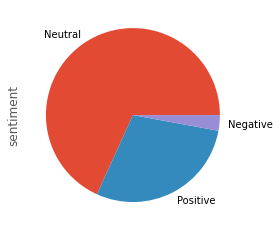

In [43]:
scores_df_pre['sentiment'].value_counts().plot.pie();

I think the movie is Ok, but we need to collect more data of course!